<a href="https://colab.research.google.com/github/ShmatArtem/TMSds/blob/main/HW19_Shmat_Artem_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#Загружаем готовый сет из работы про классификацию
df = pd.read_csv('medical_insurance.csv')

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
# Преобразуем категориальные данные
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['sex'])
sex = le.transform(df['sex'])
df['sex'] = sex

le2 = LabelEncoder()

le2.fit(df['smoker'])
smoker = le2.transform(df['smoker'])
df['smoker'] = smoker

df = pd.get_dummies(df, columns = ['region'], dtype = int)

df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,8569.86180,0,0,1,0
2768,21,0,34.600,0,0,2020.17700,0,0,0,1
2769,19,1,26.030,1,1,16450.89470,0,1,0,0
2770,23,1,18.715,0,0,21595.38229,0,1,0,0


In [9]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463,13261.369959,0.237374,0.239538,0.276335,0.246753
std,14.081459,0.500038,6.129449,1.214806,0.402647,12151.768945,0.425550,0.426879,0.447265,0.431200
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,26.220000,0.000000,0.000000,4687.797000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,9333.014350,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.770000,2.000000,0.000000,16577.779500,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


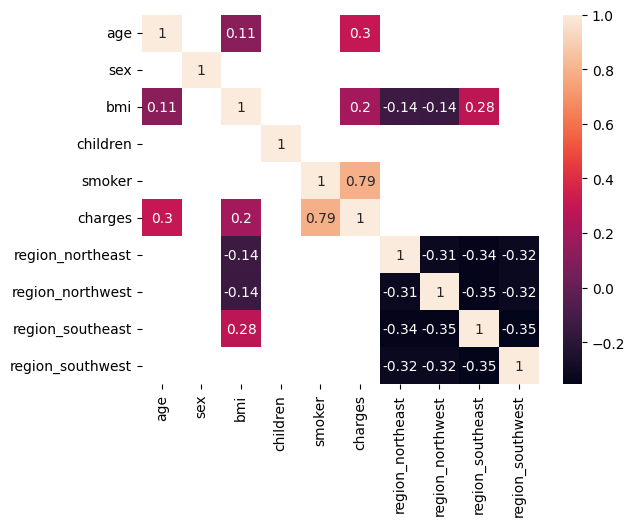

In [10]:
import seaborn as sns

sns.heatmap(data = df.corr()[df.corr().abs() > 0.1], annot = True)
plt.show()

Linear Regression

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
X = df.drop('charges', axis =1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

y_pred_test = linear_regr.predict(X_test)
y_pred_train = linear_regr.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

mae_list = []
mse_list = []

mae_list.append(mae_test)
mse_list.append(mse_test)

In [13]:
mae_learning_test = []
mae_learning_train = []

for i in range(1,len(X_train)):
  linear_regr.fit(X_train[:i], y_train[:i])

  y_pred_test = linear_regr.predict(X_test[:i])
  y_pred_train = linear_regr.predict(X_train[:i])

  mae_test = mean_absolute_error(y_test[:i], y_pred_test[:i])
  mae_train = mean_absolute_error(y_train[:i], y_pred_train[:i])

  mae_learning_test.append(mae_test)
  mae_learning_train.append(mae_train)

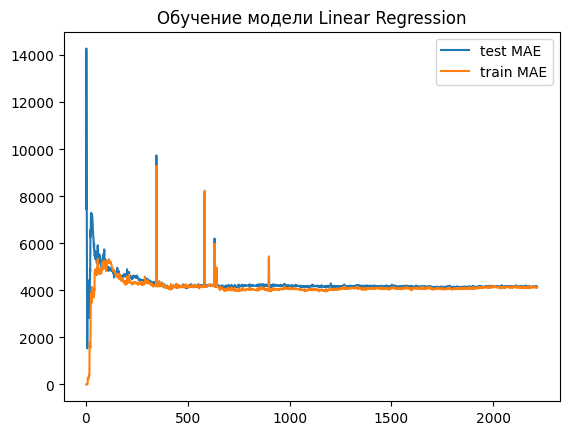

In [14]:
plt.plot(range(1,len(X_train)), mae_learning_test, label = 'test MAE')
plt.plot(range(1,len(X_train)), mae_learning_train, label = 'train MAE')
plt.title('Обучение модели Linear Regression')
plt.legend()
plt.show()

In [15]:
print(f'Ошибка MAE на тренировочных данных: {mae_train}')
print(f'Ошибка MAE на валидационных данных: {mae_test}')

print(f'Ошибка MSE на тренировочных данных: {mse_train}')
print(f'Ошибка MSE на валидационных данных: {mse_test}')

Ошибка MAE на тренировочных данных: 4129.252832139871
Ошибка MAE на валидационных данных: 4157.685996584458
Ошибка MSE на тренировочных данных: 35995537.77563952
Ошибка MSE на валидационных данных: 39935688.96953277


Модель очень плохая, огромная ошибка получается, надо проверить на других моделях. И вроде как модель не переобученая, так как огромная ошибка есть и на тренировочных данных. Не знаю, почему так, посмотрю на других моделях.

Neural Network Regression

In [16]:
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import r2_score

model_NN = tf.keras.Sequential([
    tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=28, activation='relu'),
    tf.keras.layers.Dense(units=28, activation='relu'),
    tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=1, activation = 'relu')
])

model_NN.compile(optimizer='adam', loss='mae')

loss = model_NN.fit(X_train, y_train, epochs = 800)

Epoch 1/800
70/70 [==============================] - 2s 3ms/step - loss: 13369.3369
Epoch 2/800
70/70 [==============================] - 0s 2ms/step - loss: 13313.4727
Epoch 3/800
70/70 [==============================] - 0s 2ms/step - loss: 12528.7451
Epoch 4/800
70/70 [==============================] - 0s 2ms/step - loss: 9433.5205
Epoch 5/800
70/70 [==============================] - 0s 2ms/step - loss: 7627.2764
Epoch 6/800
70/70 [==============================] - 0s 2ms/step - loss: 7393.3540
Epoch 7/800
70/70 [==============================] - 0s 2ms/step - loss: 7179.7129
Epoch 8/800
70/70 [==============================] - 0s 2ms/step - loss: 6938.7334
Epoch 9/800
70/70 [==============================] - 0s 2ms/step - loss: 6661.1006
Epoch 10/800
70/70 [==============================] - 0s 2ms/step - loss: 6324.9395
Epoch 11/800
70/70 [==============================] - 0s 2ms/step - loss: 5890.1802
Epoch 12/800
70/70 [==============================] - 0s 2ms/step - loss: 5344.907

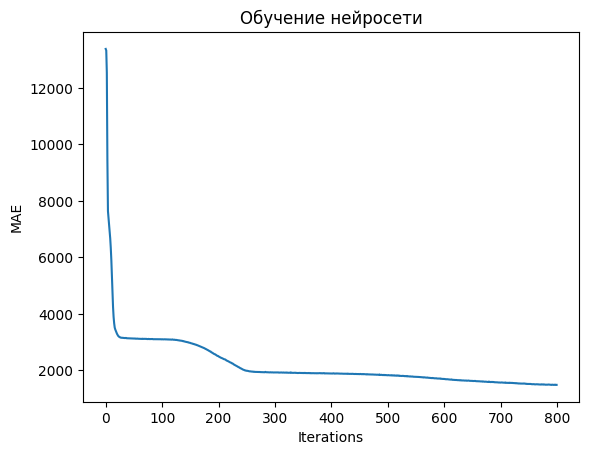

In [17]:
plt.plot(loss.history['loss'])
plt.title('Обучение нейросети')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.show()

In [18]:
y_pred = model_NN.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

mae_list.append(mae_test)
mse_list.append(mse_test)

print(f"Ошибка MAE на тренировочных данных: {loss.history['loss'][-1]}")
print(f'Ошибка MAE на валидационных данных: {mae_test}')
print(f'Ошибка MSE на валидационных данных: {mse_test}')

18/18 [==============================] - 0s 3ms/step
Ошибка MAE на тренировочных данных: 1474.70263671875
Ошибка MAE на валидационных данных: 1688.044084101844
Ошибка MSE на валидационных данных: 25965426.33232276


SVM Regression

In [19]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

y_pred = svr.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)

mae_list.append(mae_test)
mse_list.append(mse_test)

print(f"Ошибка MAE на тренировочных данных: {mae_train}")
print(f'Ошибка MAE на валидационных данных: {mae_test}')
print(f'Ошибка MSE на тренировочных данных: {mse_train}')
print(f'Ошибка MSE на валидационных данных: {mse_test}')

Ошибка MAE на тренировочных данных: 8324.160922861036
Ошибка MAE на валидационных данных: 8334.169491995468
Ошибка MSE на тренировочных данных: 160597156.64044964
Ошибка MSE на валидационных данных: 163997052.0899305


In [20]:
mae_learning_test = []
mae_learning_train = []

for i in range(1,len(X_train)):
  svr = SVR()

  svr.fit(X_train[:i], y_train[:i])

  y_pred_test = svr.predict(X_test[:i])
  y_pred_train = svr.predict(X_train[:i])

  mae_test = mean_absolute_error(y_test[:i], y_pred_test[:i])
  mae_train = mean_absolute_error(y_train[:i], y_pred_train[:i])

  mae_learning_test.append(mae_test)
  mae_learning_train.append(mae_train)

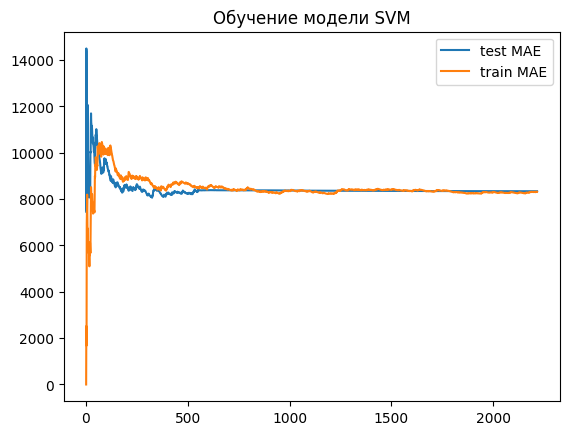

In [21]:
plt.plot(range(1,len(X_train)), mae_learning_test, label = 'test MAE')
plt.plot(range(1,len(X_train)), mae_learning_train, label = 'train MAE')
plt.title('Обучение модели SVM')
plt.legend()
plt.show()

Decision Tree Regression

In [22]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.0 MB/s eta 0:00:00


In [23]:
# Найдём оптимальные гиперпараметры с помощью Optuna
from sklearn.tree import DecisionTreeRegressor
import optuna

def objective_dtr(trial):

    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)

    dtr = DecisionTreeRegressor(max_depth=max_depth)
    dtr.fit(X_train, y_train)

    y_pred = dtr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

optuna.logging.disable_default_handler() # Скрываем лог

study = optuna.create_study()
study.optimize(objective_dtr, n_trials=100)

best_dtr = study.best_params

In [24]:
# Decision Tree с подобранными гиперпараметрами
dtr = DecisionTreeRegressor(max_depth = best_dtr['max_depth'], min_samples_leaf = best_dtr['min_samples_leaf'])
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

y_pred = svr.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)

mae_list.append(mae_test)
mse_list.append(mse_test)

print(f"Ошибка MAE на тренировочных данных: {mae_train}")
print(f'Ошибка MAE на валидационных данных: {mae_test}')
print(f'Ошибка MSE на тренировочных данных: {mse_train}')
print(f'Ошибка MSE на валидационных данных: {mse_test}')

Ошибка MAE на тренировочных данных: 8324.203910313034
Ошибка MAE на валидационных данных: 2583.14392826876
Ошибка MSE на тренировочных данных: 160619818.93709552
Ошибка MSE на валидационных данных: 22055129.07545336


In [25]:
mae_learning_test = []
mae_learning_train = []

for i in range(1,len(X_train)):
  dtr = DecisionTreeRegressor(max_depth = best_dtr['max_depth'], min_samples_leaf = best_dtr['min_samples_leaf'])

  dtr.fit(X_train[:i], y_train[:i])

  y_pred_test = dtr.predict(X_test[:i])
  y_pred_train = dtr.predict(X_train[:i])

  mae_test = mean_absolute_error(y_test[:i], y_pred_test[:i])
  mae_train = mean_absolute_error(y_train[:i], y_pred_train[:i])

  mae_learning_test.append(mae_test)
  mae_learning_train.append(mae_train)

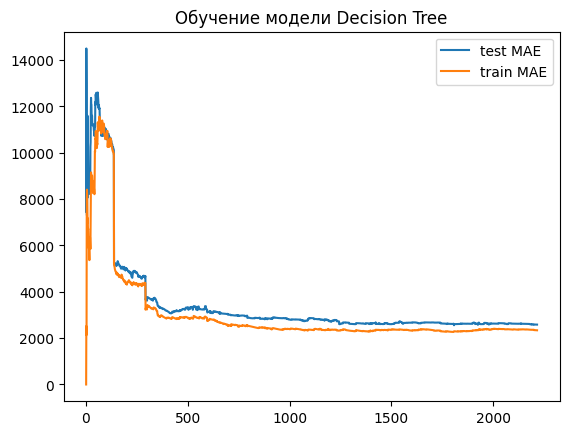

In [26]:
plt.plot(range(1,len(X_train)), mae_learning_test, label = 'test MAE')
plt.plot(range(1,len(X_train)), mae_learning_train, label = 'train MAE')
plt.title('Обучение модели Decision Tree')
plt.legend()
plt.show()

Random Forest

In [ ]:
# Найдём оптимальные гиперпараметры с помощью Optuna
from sklearn.ensemble import RandomForestRegressor

def objective_rf(trial):

    n_estimators = trial.suggest_int('n_estimators', 1, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    max_features = trial.suggest_int('max_features', 1, 5)

    rf = RandomForestRegressor(max_depth=max_depth,
                                n_estimators = n_estimators,
                                max_features = max_features)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

optuna.logging.disable_default_handler() # Скрываем лог

study = optuna.create_study()
study.optimize(objective_rf, n_trials = 250)

best_rf = study.best_params

In [28]:
best_rf

{'n_estimators': 47, 'max_depth': 10, 'max_features': 5}

In [31]:
# Построим случайный лес с подобранными параметрами
rf = RandomForestRegressor(max_depth=best_rf['max_depth'],
                           n_estimators = best_rf['n_estimators'],
                           max_features = best_rf['max_features'])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

y_pred = rf.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)

mae_list.append(mae_test)
mse_list.append(mse_test)

print(f"Ошибка MAE на тренировочных данных: {mae_train}")
print(f'Ошибка MAE на валидационных данных: {mae_test}')
print(f'Ошибка MSE на тренировочных данных: {mse_train}')
print(f'Ошибка MSE на валидационных данных: {mse_test}')

Ошибка MAE на тренировочных данных: 938.4672146702003
Ошибка MAE на валидационных данных: 1622.0769763187182
Ошибка MSE на тренировочных данных: 3583013.9670846155
Ошибка MSE на валидационных данных: 10218966.479493236


In [ ]:
importance = pd.Series(rf.feature_importances_)
fig, ax = plt.subplots(figsize=(5,5))
skl_imp.plot.bar(ax=ax)
ax.set_title("Feature importances") #важность признаков
ax.set_ylabel('Features')
fig.tight_layout()

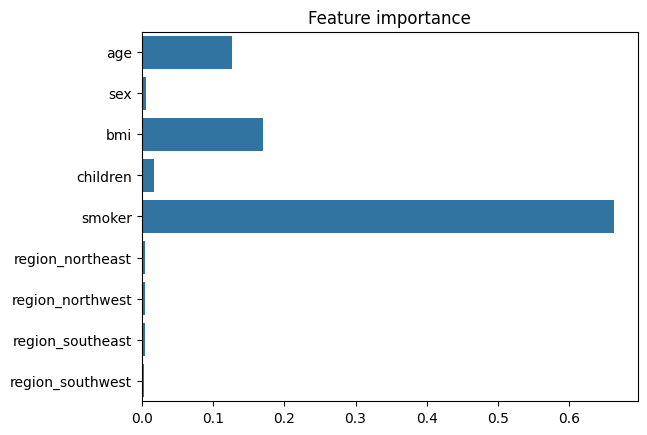

In [42]:
importance = pd.Series(rf.feature_importances_, df.columns.drop('charges'))

sns.barplot(importance, orient = 'y')
plt.title('Feature importance')
plt.show()

CatBoost

In [58]:
from sklearn.ensemble import AdaBoostRegressor

def objective_rf(trial):

    n_estimators = trial.suggest_int('n_estimators', 1, 1000)
    learning_rate = trial.suggest_int('learning_rate', 1, 5)

    adab = AdaBoostRegressor(n_estimators= n_estimators, loss='linear',
                          learning_rate=learning_rate)
    adab.fit(X_train, y_train)

    y_pred = adab.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

# optuna.logging.disable_default_handler() # Скрываем лог

study = optuna.create_study()
study.optimize(objective_rf, n_trials = 1000)

best_adab = study.best_params

[I 2024-04-29 06:53:08,331] A new study created in memory with name: no-name-86b7b1c4-2bc3-44ce-8d9f-ae1f0612bae6
[I 2024-04-29 06:53:08,403] Trial 0 finished with value: 2913.2344454608606 and parameters: {'n_estimators': 701, 'learning_rate': 3}. Best is trial 0 with value: 2913.2344454608606.
[I 2024-04-29 06:53:08,611] Trial 1 finished with value: 7929.822219470558 and parameters: {'n_estimators': 759, 'learning_rate': 4}. Best is trial 0 with value: 2913.2344454608606.
[I 2024-04-29 06:53:08,833] Trial 2 finished with value: 8623.241561551677 and parameters: {'n_estimators': 91, 'learning_rate': 4}. Best is trial 0 with value: 2913.2344454608606.
[I 2024-04-29 06:53:08,886] Trial 3 finished with value: 2853.4206989249087 and parameters: {'n_estimators': 961, 'learning_rate': 3}. Best is trial 3 with value: 2853.4206989249087.
[I 2024-04-29 06:53:08,976] Trial 4 finished with value: 2970.794608623027 and parameters: {'n_estimators': 617, 'learning_rate': 3}. Best is trial 3 with va